### Student Performance Indicator 

#### life cycle of machine learning project

    1.Understanding the problem statement 
    2.Data collection
    3.Data checks to perform 
    4.Exploratory data analysis
    5.Data preprocessing 
    6.Model training 
    7. Choose best model

#### 1) Problem statement
 - This project understand how the students performance is affected by the 
    variables such as Gender,Ethnicity,parental level of Education,Lunch and  test prepration course



### 2) Data collection 
- data contains of 8 column and 1000 rows 


### important Data and required packages

  - importing pandas ,numpy,seaborn, matplotlib and warning library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

### import the csv Data as pandas DataFrame 

In [2]:
df=pd.read_csv("stud.csv")

#### show Top 5 Records 

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### shape of the dataset

In [4]:
df.shape
df.columns
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

###  2.2 Datset Information


   -  Gender : sex of student ->(Male/Female)
   -  race/ethnicity:ethnicity of student ->(Group A,B,C,D,E)
   -   parental level of education : parents final education ->(bachelors 
    degree,some colllage,masters degree,associates degree, high school)
- Lunch : having lunch before test(standard or free/reduced)
- test prepration course : complete or not before test
- Math score
- reading score
- writing score

### 3) Data check to perform 
- check missing values
- check dublicates
- check data types
- check the number of unique values of each column
- check statistics of dataset
- check various categories present in the different categorical column

### 3.1  check missing values 

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

 ##### there are no missing values in the dataset

 ##### 3.2 check dublicates 

In [6]:
df.duplicated().sum()

0

##### there are no duplicated values in the dataset

### 3.3 check datatypes

In [7]:
# check  null and Dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 check statistics of dataset


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight 
- from above description of numerical data ,all means are very close to each other between 66 and 68.
- all standard deviation are also close - between 14.6 and 15.19
- while there is minimum score 0 for math , for writing minimum is much higher =10  and for reading myet higher = 17

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("category in gender variable:  ",end =" ")
print(df["gender"].unique())

print('category in race_enthncity :   ',end=" ")
print(df["race_ethnicity"].unique())

print('category in parental_level_of_education variable:  ',end =" ")
print(df['parental_level_of_education'].unique())

print('category in lunch variable:  ',end=" ")
print(df['lunch'].unique())

print("categories in test_preparation_course variable: ",end=" ")      
print(df['test_preparation_course'].unique())


category in gender variable:   ['female' 'male']
category in race_enthncity :    ['group B' 'group C' 'group A' 'group D' 'group E']
category in parental_level_of_education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
category in lunch variable:   ['standard' 'free/reduced']
categories in test_preparation_course variable:  ['none' 'completed']


In [12]:
## define numerical and  categorical column 
numerical_feature = [feature for feature in df.columns if df[feature].dtype !="O"]
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]

In [13]:
print("we have {} numerical_features:  {}".format(len(numerical_feature),numerical_feature))
print("we hahe {} categorical features:  {}".format(len(categorical_feature),categorical_feature))

we have 3 numerical_features:  ['math_score', 'reading_score', 'writing_score']
we hahe 5 categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## 3.6 Adding columns for 'Total score' and "average"

In [15]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full =df[df["writing_score"]==100]["Average"].count()
math_full = df[df['math_score']==100]['Average'].count()
print(f'number student full marks in math:  {math_full}')
print(f'number of student full marks in reading:  {reading_full}')
print(f"number of student full marks in writing:  {writing_full}")

number student full marks in math:  7
number of student full marks in reading:  17
number of student full marks in writing:  14


In [17]:
reading_less_20 = df[df['reading_score']<=20]['Average'].count()
writing_less_20 =df[df['writing_score']<=20]['Average'].count()
math_less_20 = df[df['math_score']<=20]['Average'].count()
print(f'number of students with less than 20 marks in reading:  {reading_less_20} ')
print(f'number of students with less than 20 marks in writing:  {writing_less_20} ')
print(f'number student with less than 20 marks in math:  {math_less_20}')

number of students with less than 20 marks in reading:  1 
number of students with less than 20 marks in writing:  3 
number student with less than 20 marks in math:  4


##### Insight
- from above values we get students have performed the worst in math
- best performance is in reading section

### Exploring data (Visualization)

4.1 Visualize average score distribution to make some conclusion 
- Histogram
- Kernel Distribution function(KDE)

#### Histogram and KDE

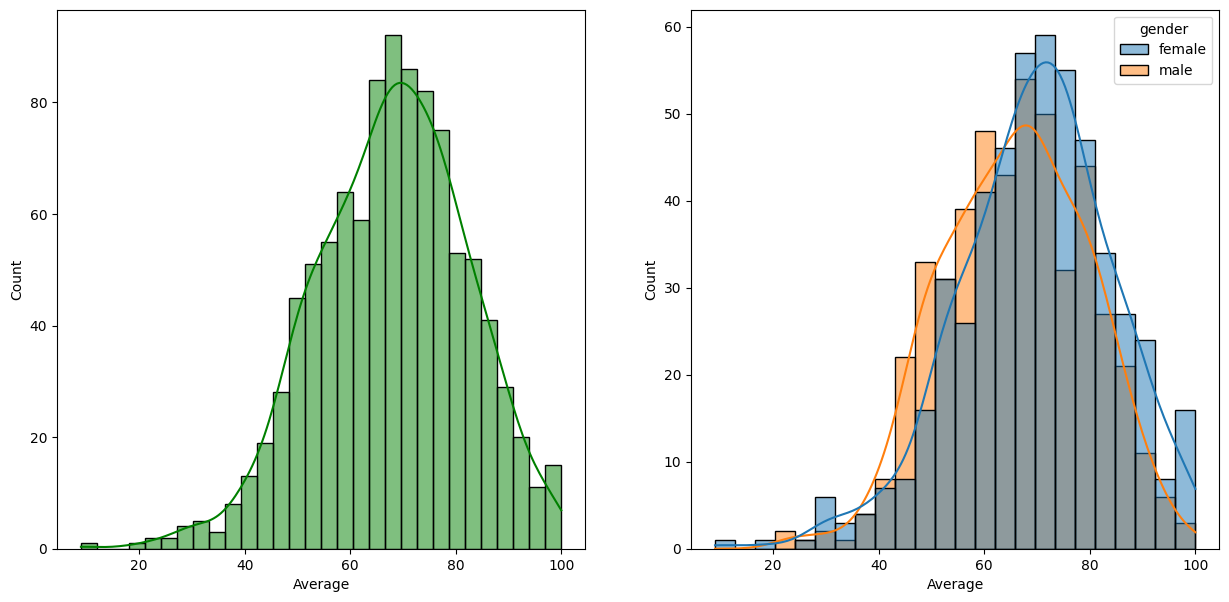

In [18]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x= 'Average',bins =30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',hue='gender',kde=True)
plt.show()


<Axes: xlabel='total_score', ylabel='Count'>

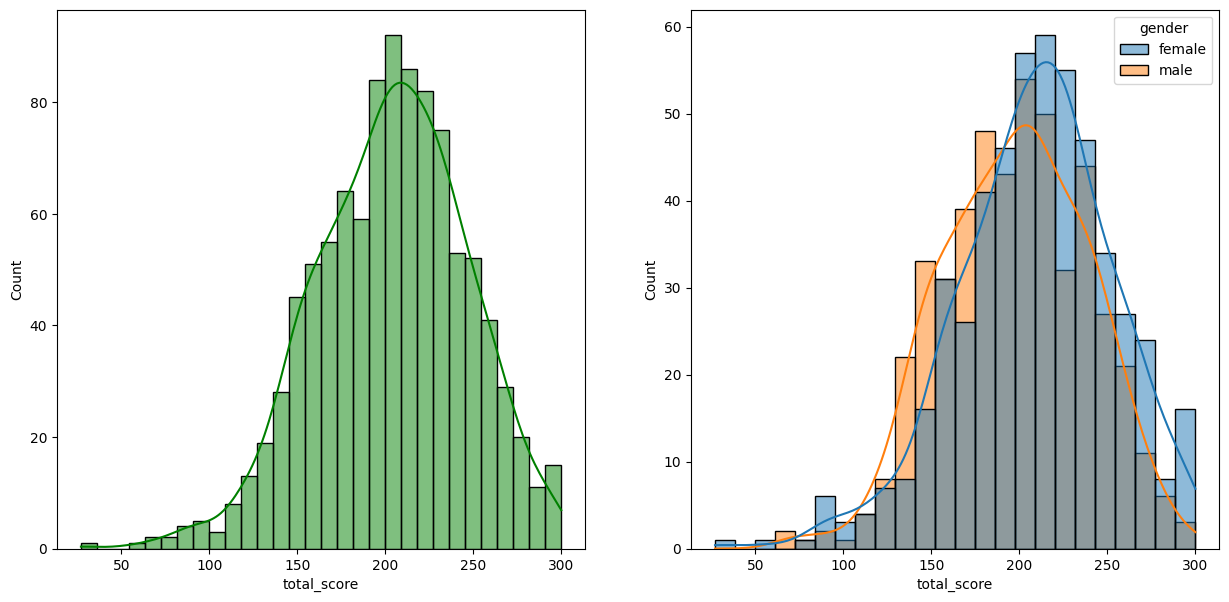

In [19]:
fig, axs=plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="total_score",hue='gender',kde=True)

### Insight
- female students tend to perform well than male students

<Axes: xlabel='Average', ylabel='Count'>

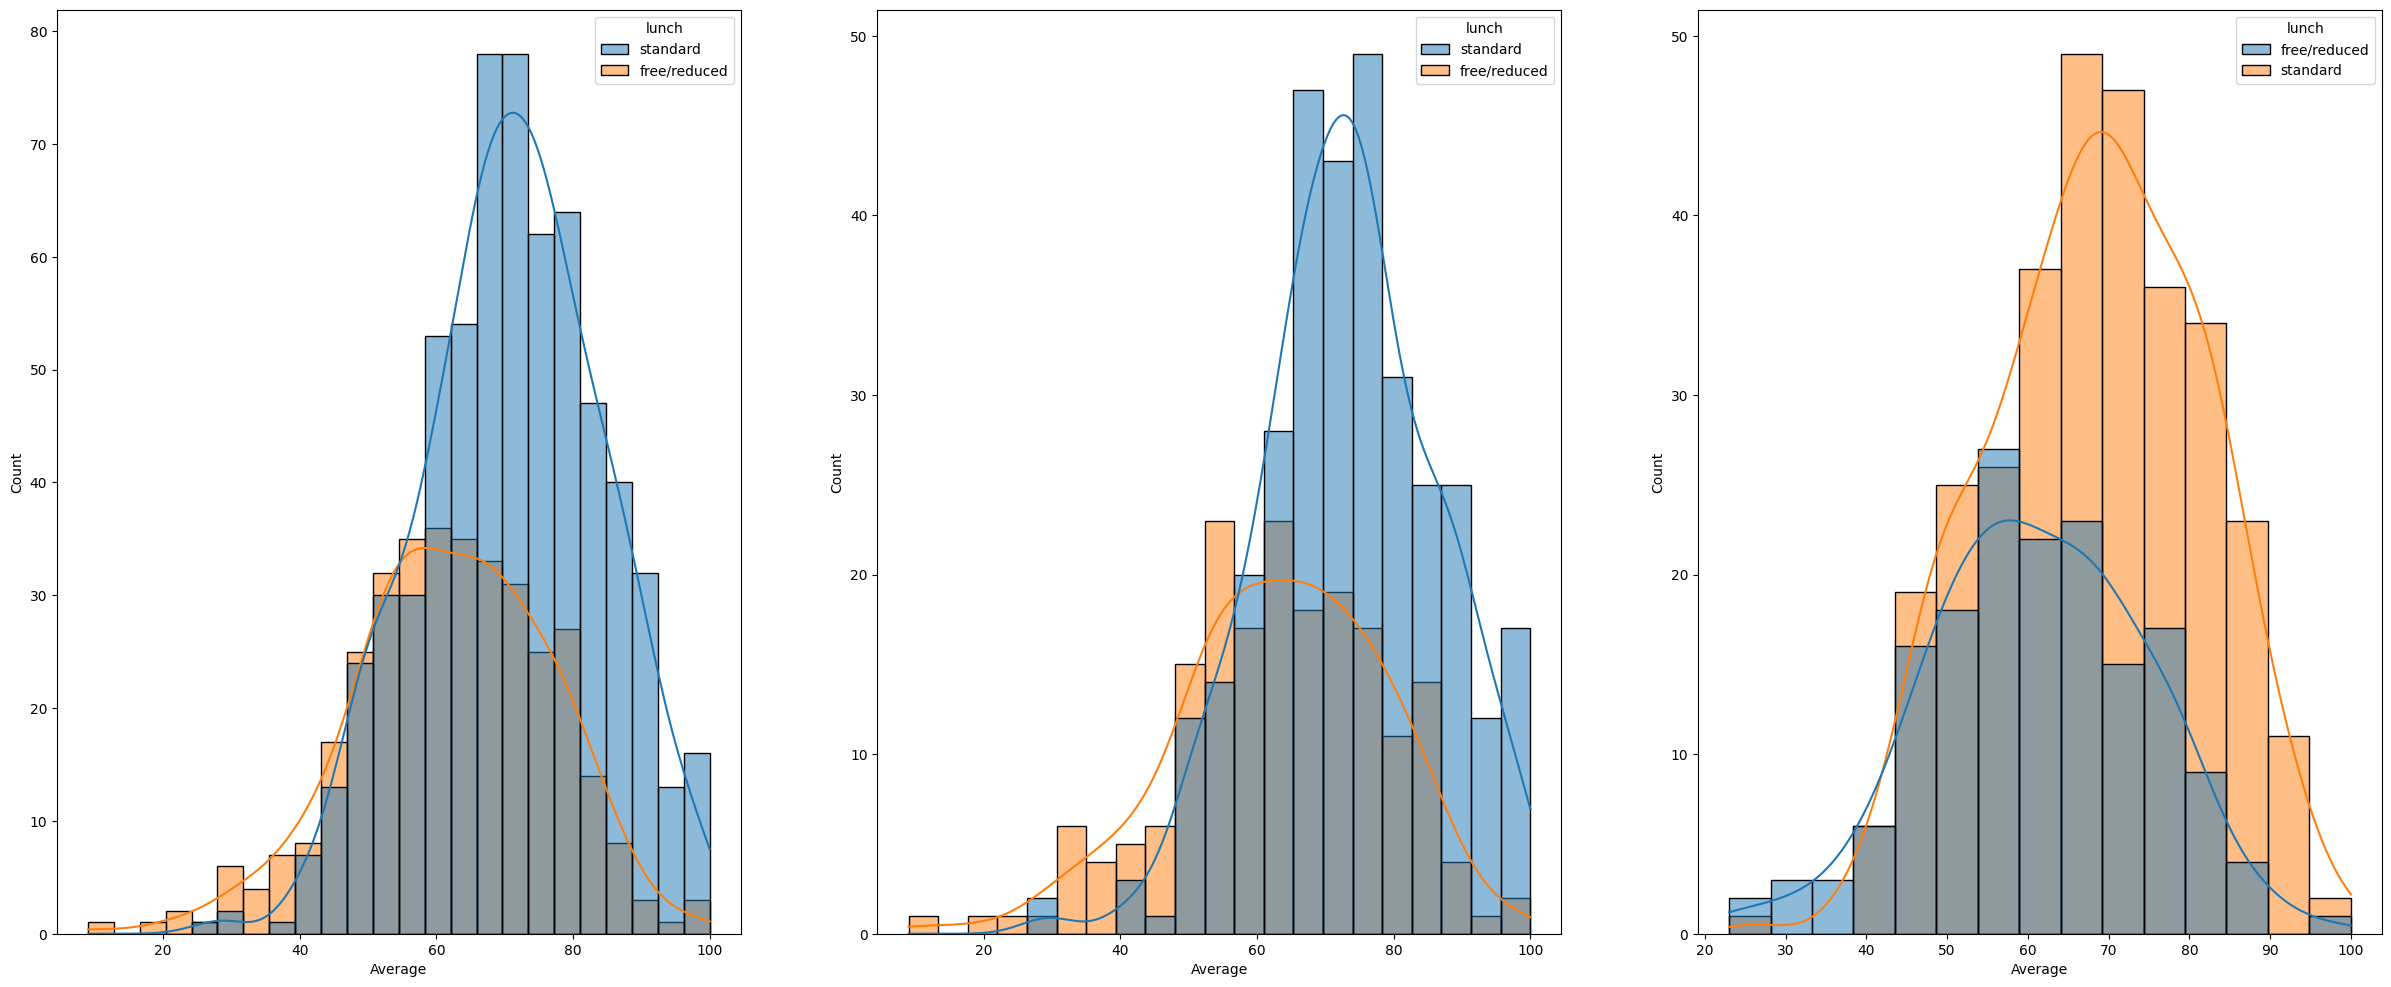

In [20]:
plt.subplots(1,5,figsize=(30,12))
plt.subplot(131)
sns.histplot(data=df,x="Average",kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x ='Average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average',hue='lunch',kde=True)

### Insights

- standard lunch helps perform well in exams 
- standard lunch helps perform well in exam be it a male or female

<Axes: xlabel='Average', ylabel='Count'>

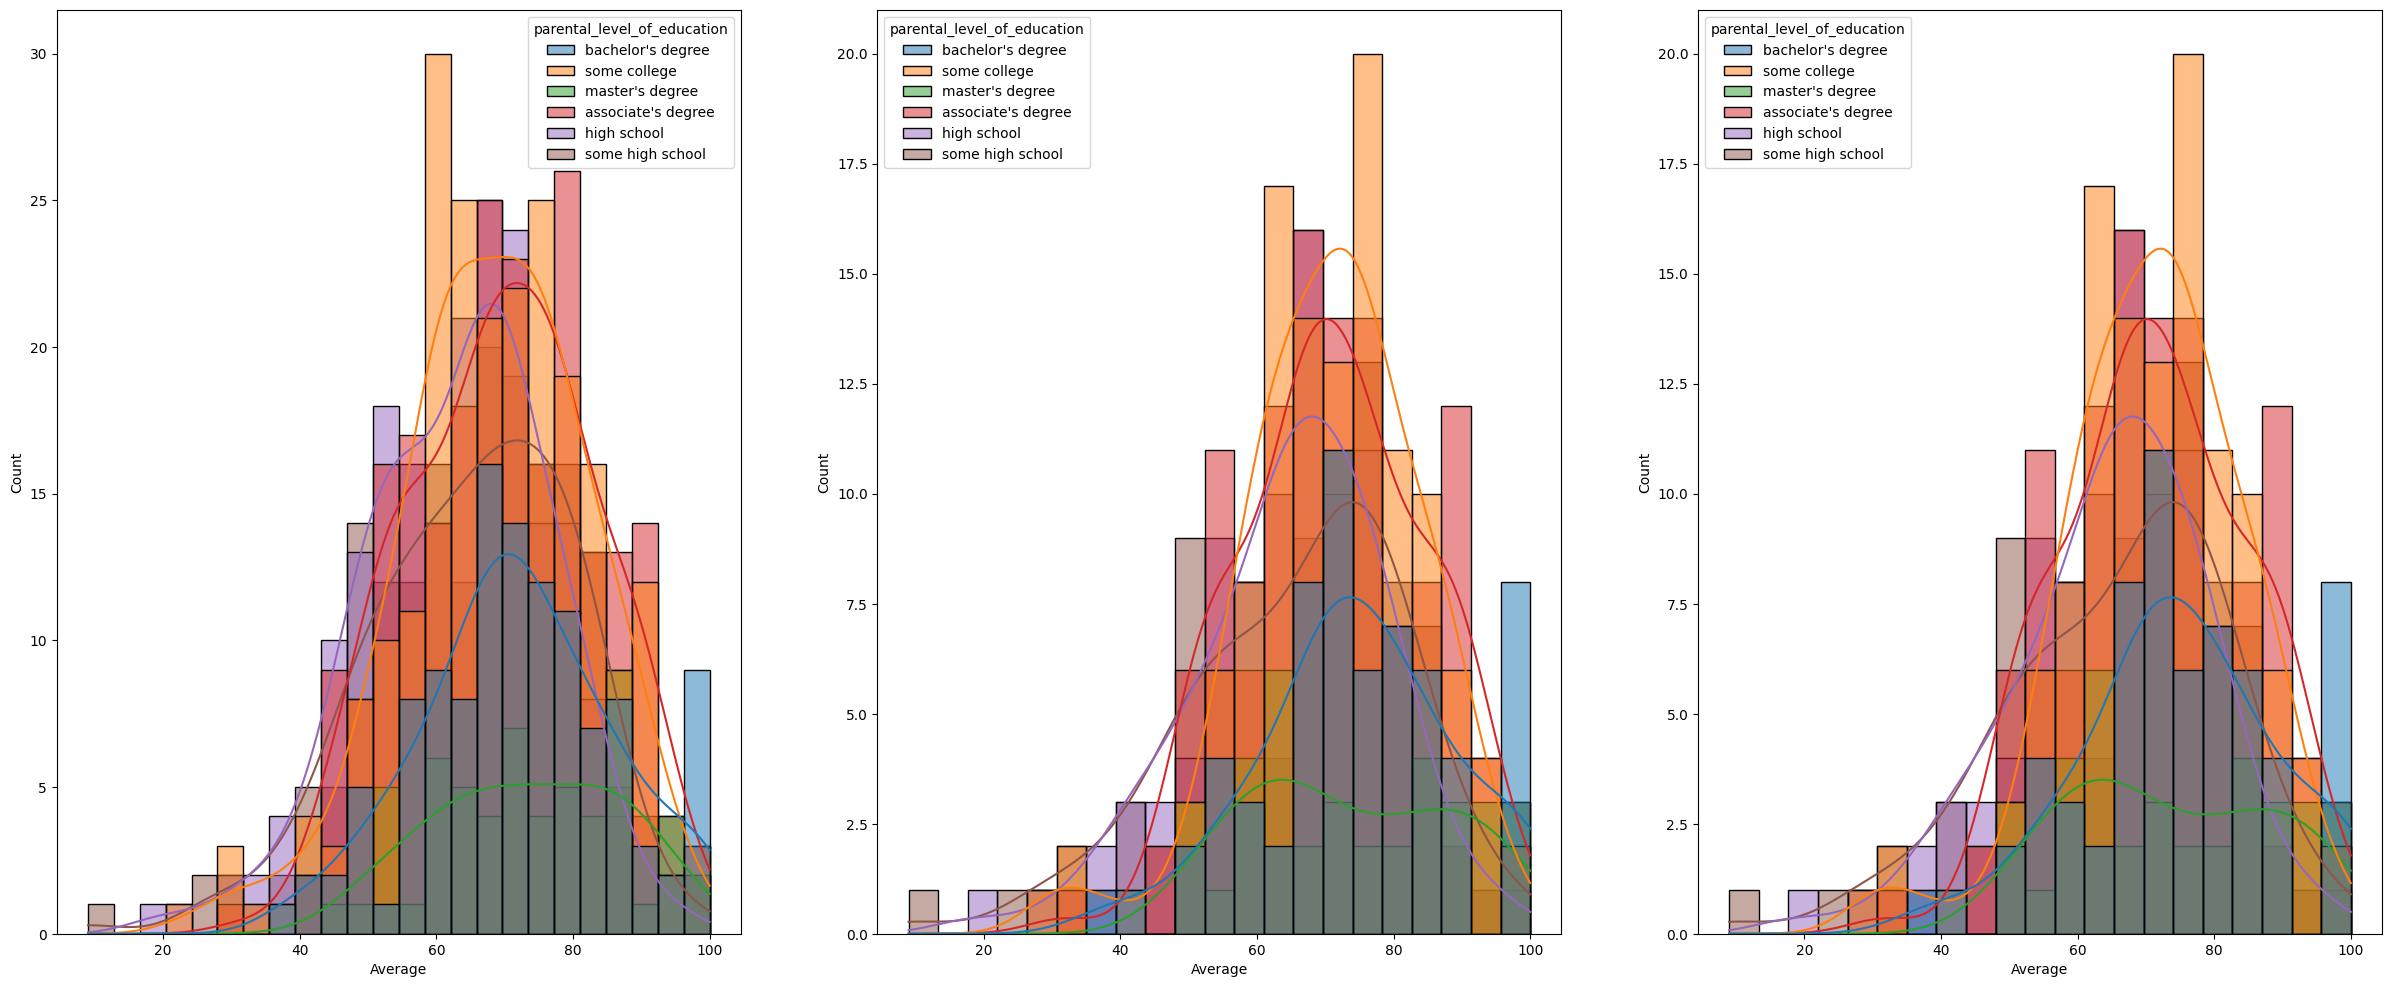

In [21]:
plt.subplots(1,3 ,figsize=(30,12))
plt.subplot(131)
sns.histplot(data=df,x='Average',hue='parental_level_of_education',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average',hue='parental_level_of_education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',hue='parental_level_of_education',kde=True)

### insights
- in general parents education dont help student perform well in exam
- 2nd plot showas that prents whose education is of associates degree or masters
  degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parents education on female students 

<Axes: xlabel='Average', ylabel='Count'>

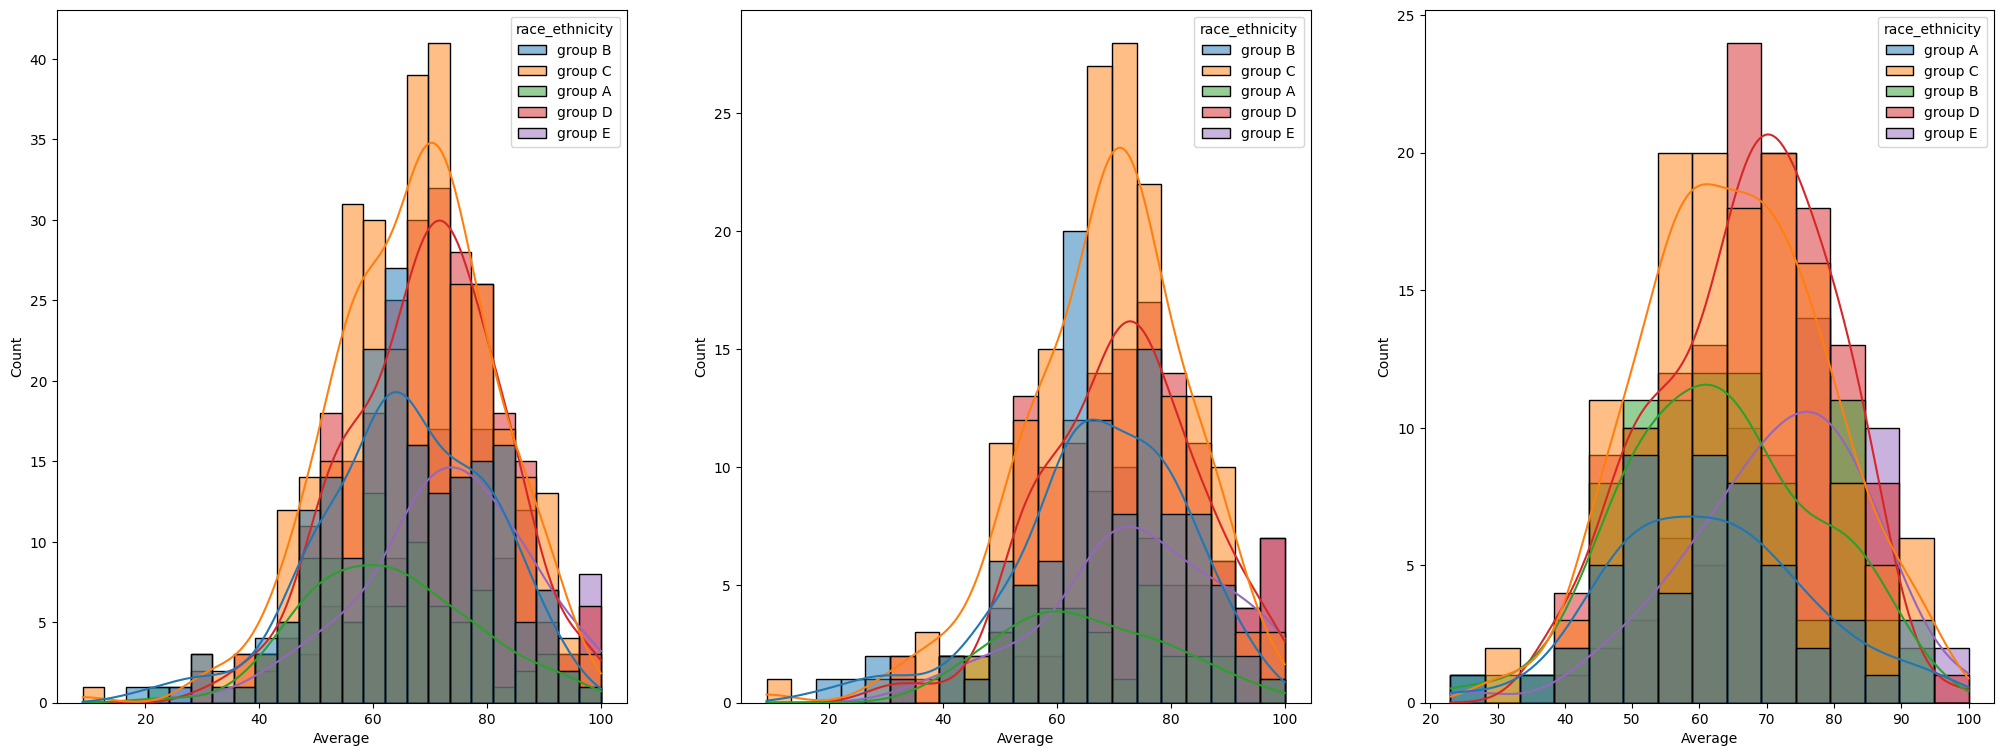

In [22]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df,x ='Average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x="Average",kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')

### Insight
- students of group A tends to perform poorly in exam.
- students of group A and Group B tends to perform poorly in exam irrespective of whether they are male or female 


### 4.2  Maximum score of students in all three subjects 

<Axes: ylabel='writing_score'>

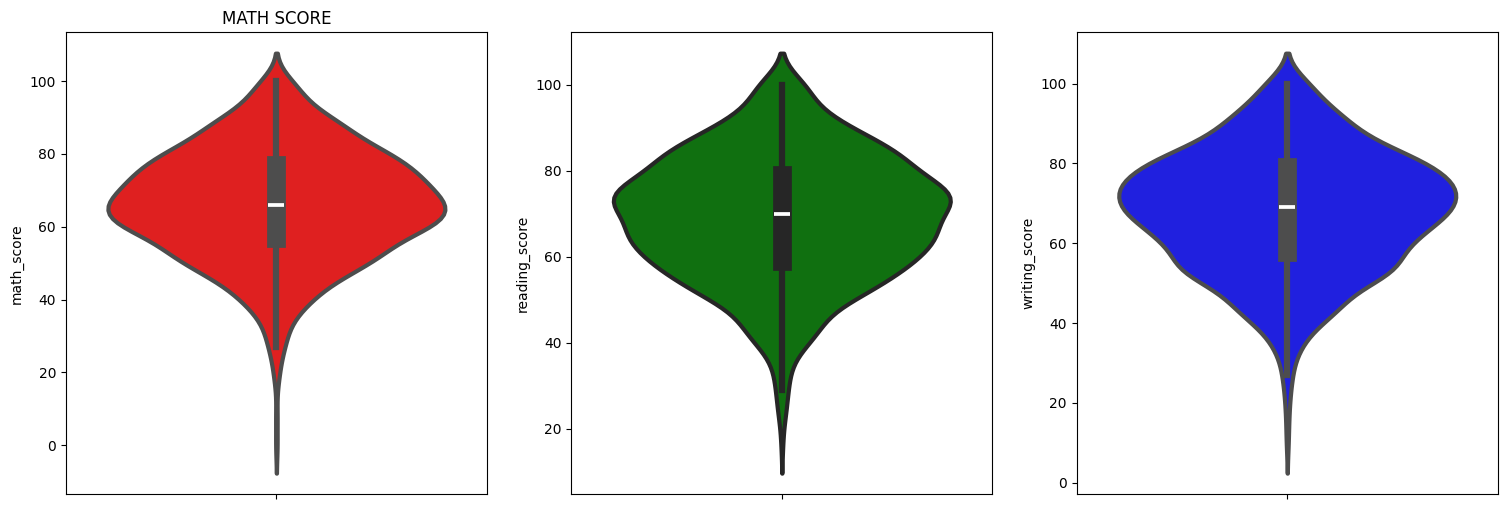

In [23]:
plt.figure(figsize=(25,6))
plt.subplot(141)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(142)
sns.violinplot(y='reading_score',data=df,color='g',linewidth=3)
plt.subplot(143)
sns.violinplot(y='writing_score',data=df,color='b',linewidth=3)

### Insights 
- from the above three plots its clearly visible that most of the students score in between 60 - 80 in math where in reading and writing most of them score from 50 - 80 

#### multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

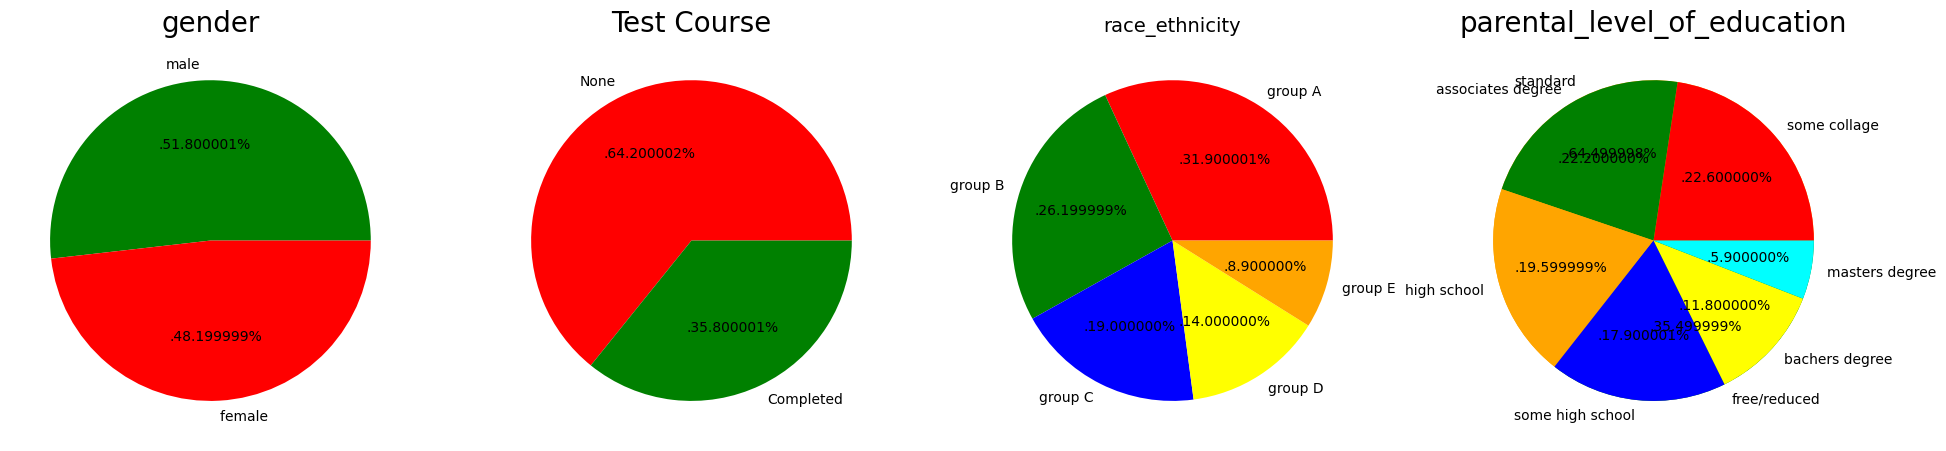

In [24]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(151)
size=df['gender'].value_counts()
labels='male','female '
color=['green','red']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('gender',fontsize=20)
plt.axis('off')

plt.subplot(152)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(153)
size =df['race_ethnicity'].value_counts()
labels='group A',"group B","group C",'group D','group E'
colors ='red','green','blue','yellow','orange'

plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=14)
plt.axis('off')

plt.subplot(154)
size=df['lunch'].value_counts()
labels='standard','free/reduced'
colors='orange','green'

plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)


plt.subplot(154)
size =df['parental_level_of_education'].value_counts()
labels='some collage','associates degree','high school','some high school','bachers degree','masters degree'
colors = 'red','green','orange','blue','yellow','cyan'

plt.pie(size,colors=colors,labels=labels,autopct='.%f%%')
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

#### Insights

- number of male and female students are almost same
- Number of students are gretest in group C
- Number of students who have standard lunch are greater
- Number of students whose parental education is "some collage" is grater follwed closely by 'Associates Degree'

### 4.4 feature wise visualization 

### 4.4.1 Gender column
- how is distribution of gender ?
- is gender has any impact on students pwerformance ?

### univariate Analysis (how is distribution of gender)

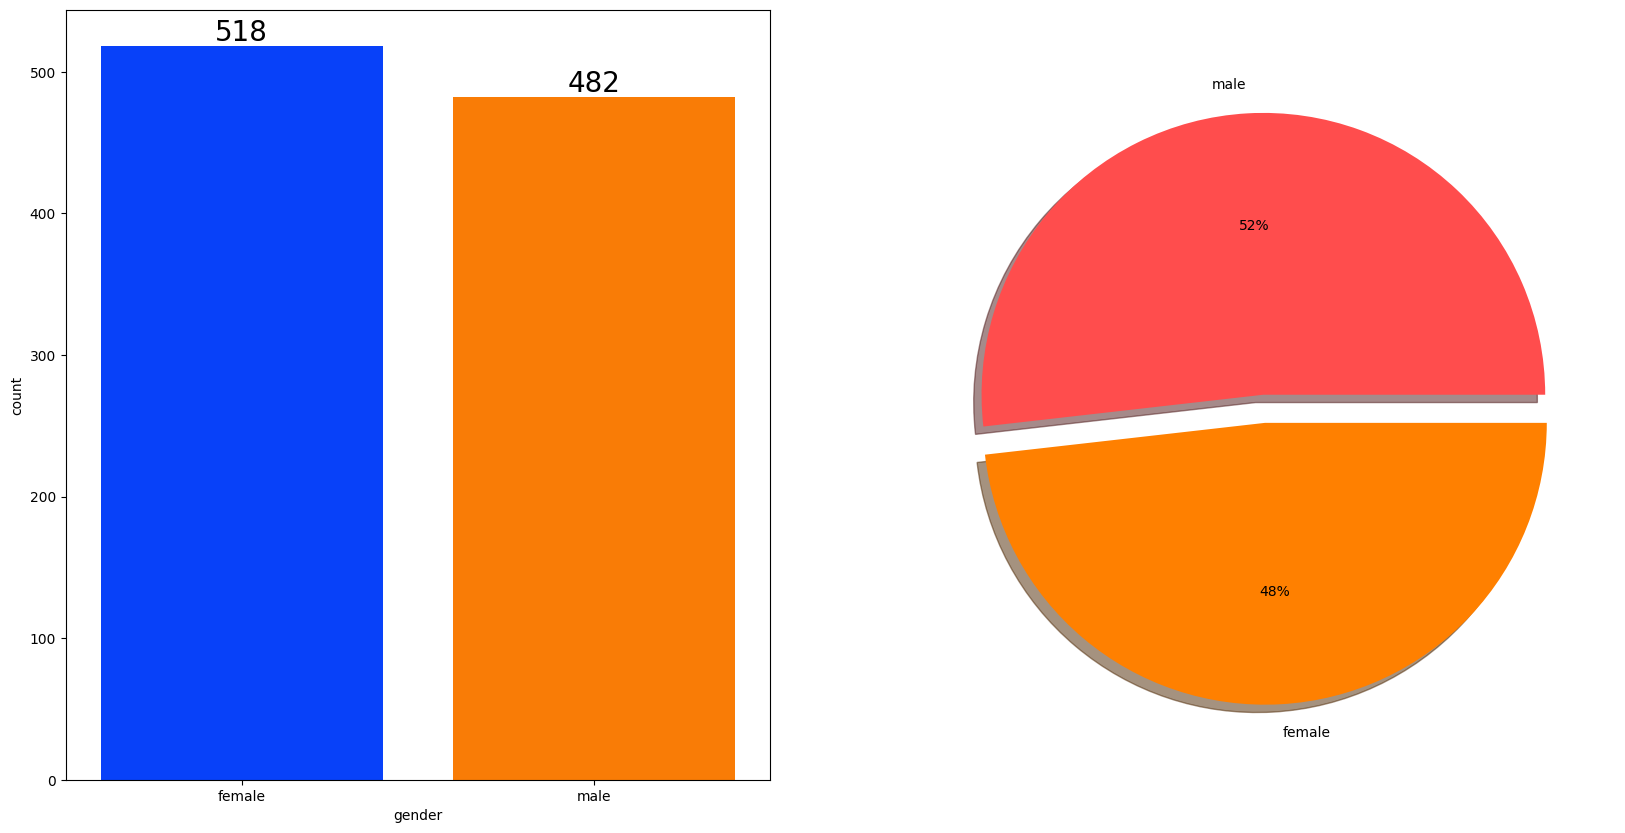

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
- Gender has balanced data with female students are 518(485) and male students are 482 (52%)

## Bivariate Analysis (is gender has anuy impact Students performance ?)

In [26]:
df_numeric = df.select_dtypes(include='number')
gender_group = df.groupby('gender')[df_numeric.columns].mean()
gender_group

,math_score,reading_score,writing_score,total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


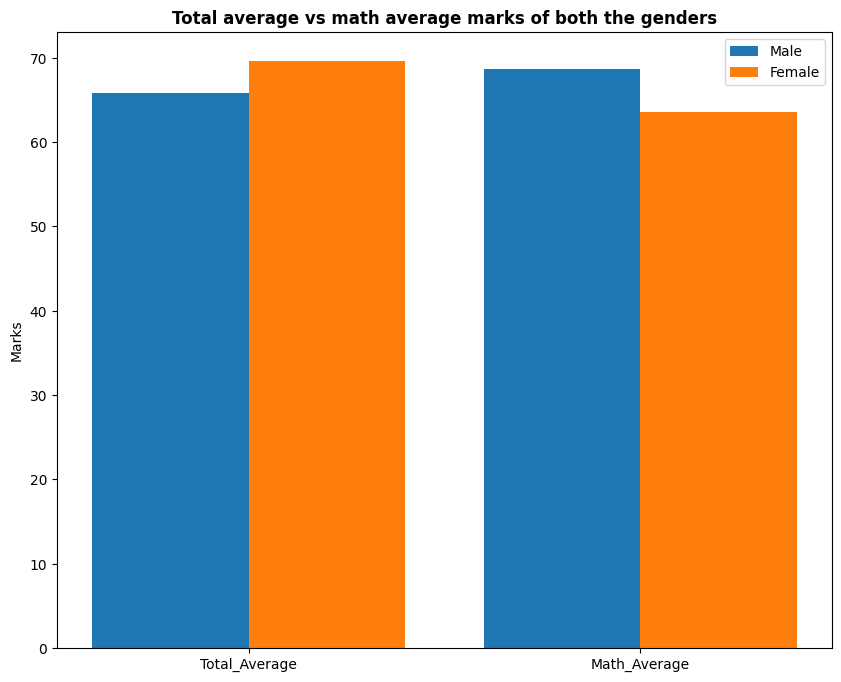

In [28]:
plt.figure(figsize=(10,8))
X = ['Total_Average','Math_Average']

female_scores = [gender_group['Average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['Average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4 ,label ='Female')


plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total average vs math average marks of both the genders',fontweight='bold')
plt.legend()
plt.show()

### Insights 
- on an average females have a better overall score than men
- where as males have scored higher in maths 

### 4.4.2 race_ethnicity
- how is group wise distribution ?
- is race_ethnicity has any impact on students performance ?

####  Univariate Analysis(how is group wise distribution ?)

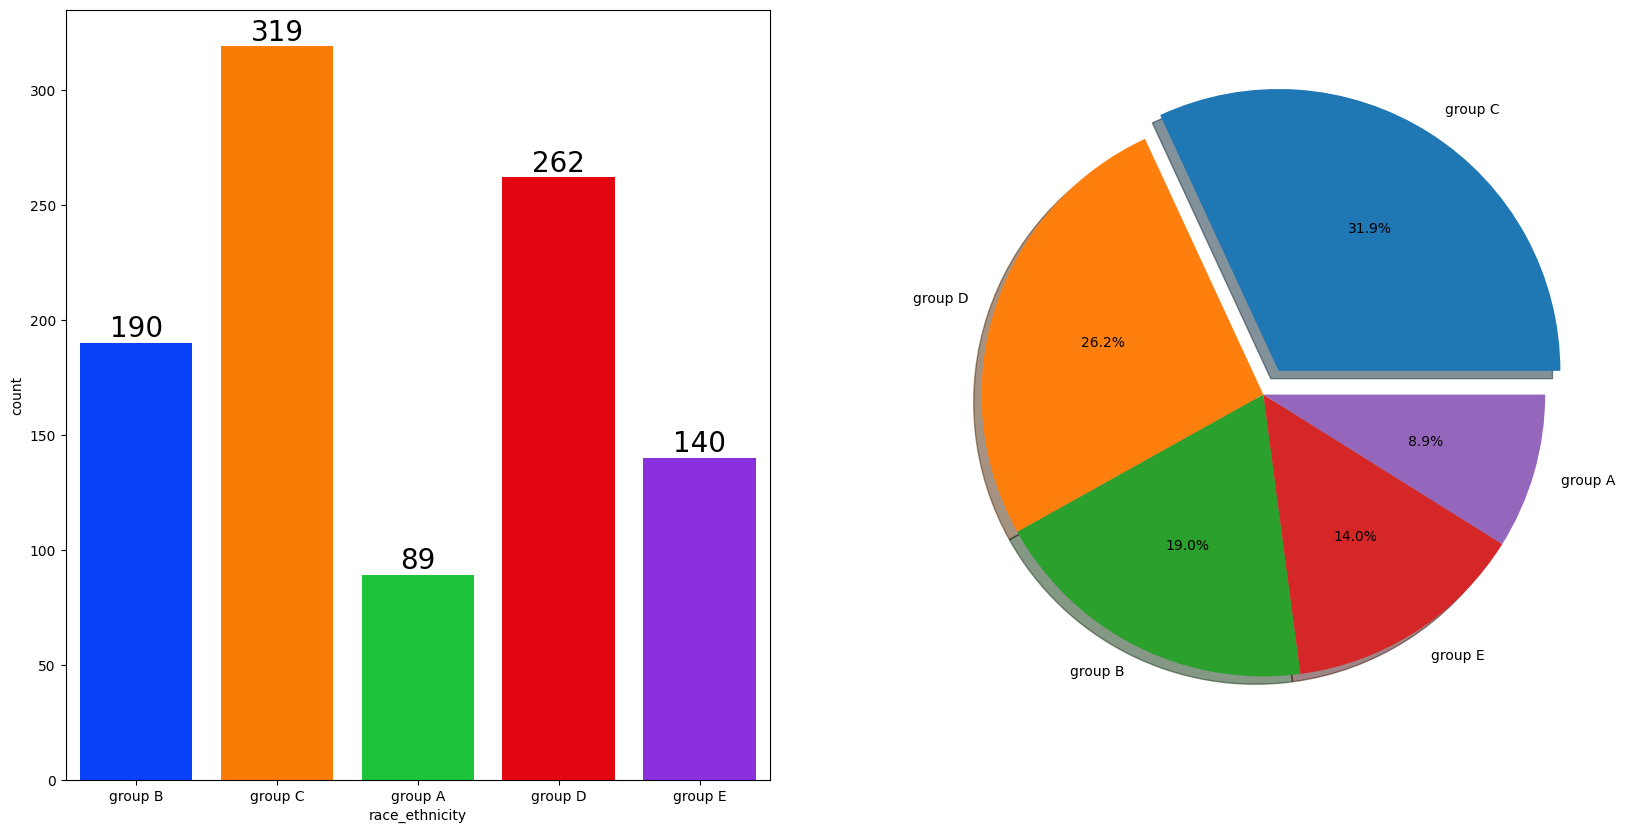

In [29]:
f,ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### insights
- Most of the students belonging from group C/group D.
- lowest number of students belong to groupA

### Bivariate Analysis (is Race_Ehnicity has any impact on studnts performance ?)

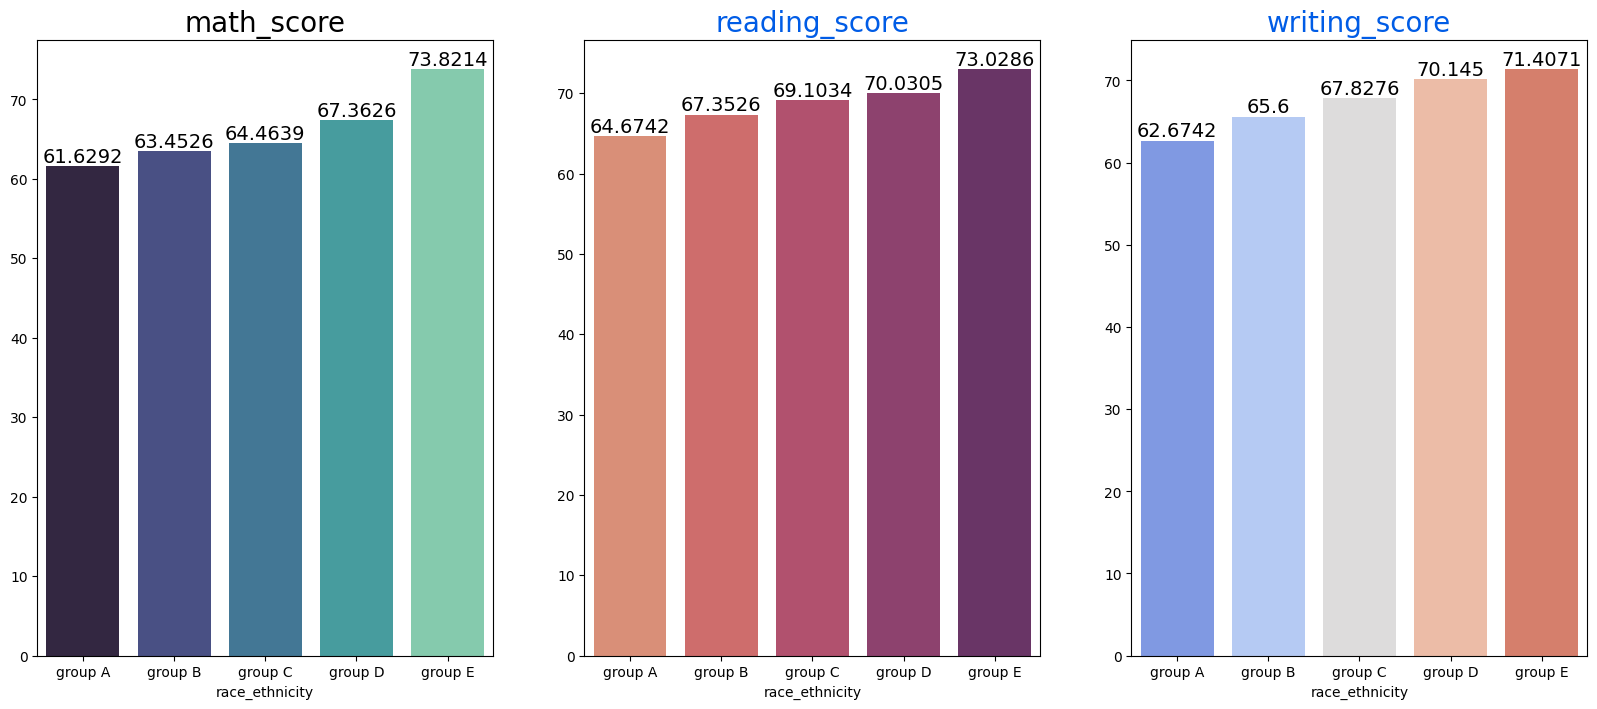

In [30]:
Group_data2 =df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('math_score',color='black',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',fontsize=14)

sns.barplot(x=Group_data2['reading_score'].mean().index,y= Group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',fontsize=14)
    ax[1].set_title('reading_score',color='#005ce6',fontsize=20)
sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing_score',color='#005ce6',fontsize=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',fontsize=14)

### Insights
- Group E Students have the highest marks
- Group A students have the lowest marks
- students from a lower socioeconomic have a lower avg in all course subjects 

### 4.4.3 Parental level of Education column
- whats is educational background of students parent ?
- is parental education has any impact on students performance?

### Univariate Analysis ( what is educational background of students parent ?)

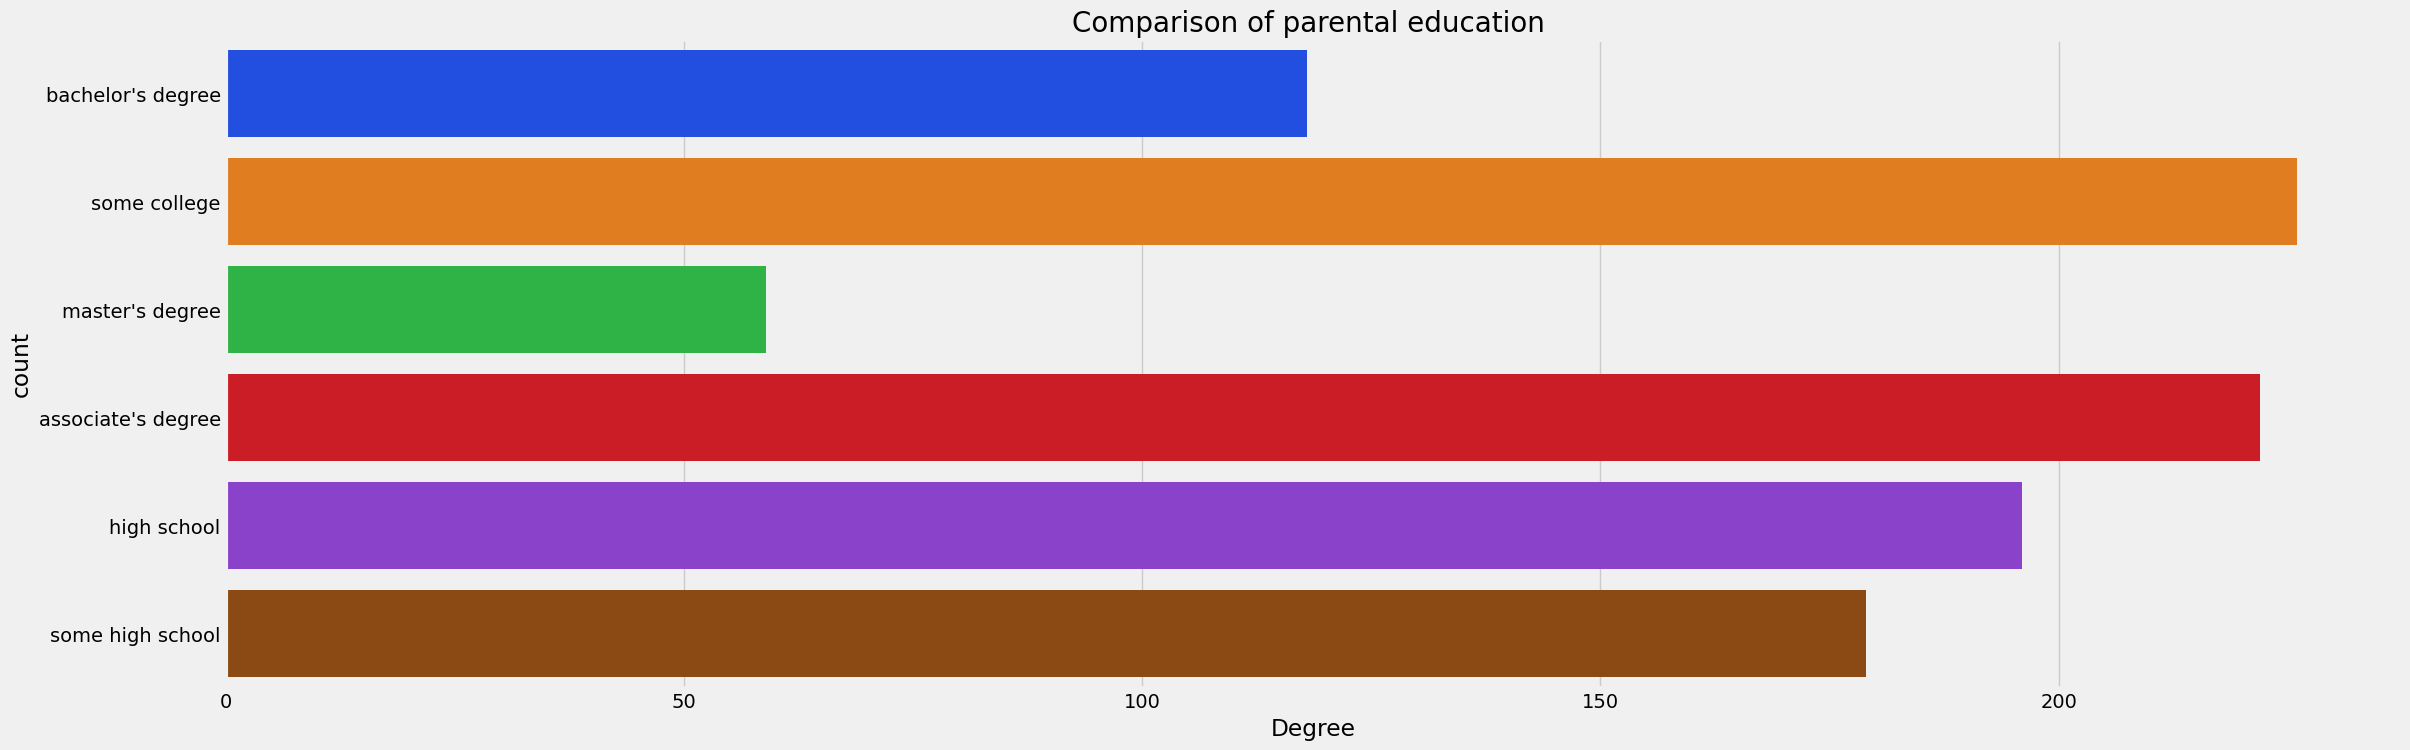

In [31]:
plt.rcParams['figure.figsize']=(25,8)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='bright')
plt.title('Comparison of parental education ',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
- Largest number of parents are from some collage

### Bivariate Analysis (IS parental education has any impact on students performance ?)

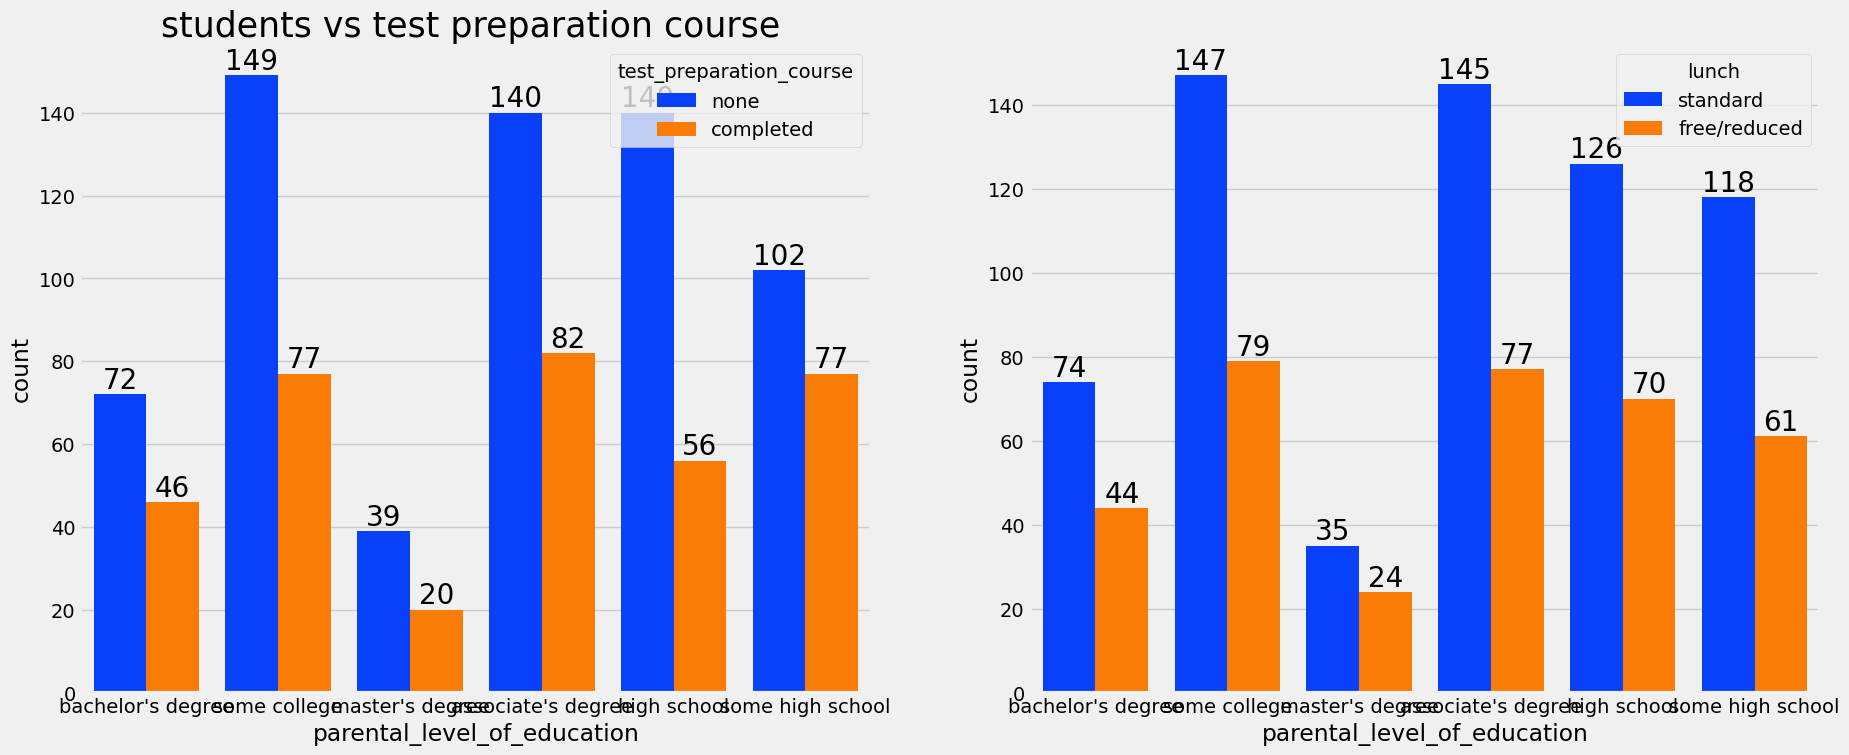

In [32]:
f,ax=plt.subplots(1,2,figsize =(20,8))
sns.countplot(x = df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('students vs test preparation course ',color='black',size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation =0.95,ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

### Insights
- students who get standard lunch tend to perform better than who students got free/reduced lunch

### Test preparation course column
- which type of lunch is most common among students ?
- is test preparation course has any impact on students performance ?

### Bivariate Analysis (is Test preparation course has any impact on students performance ?)

<Axes: xlabel='lunch', ylabel='writing_score'>

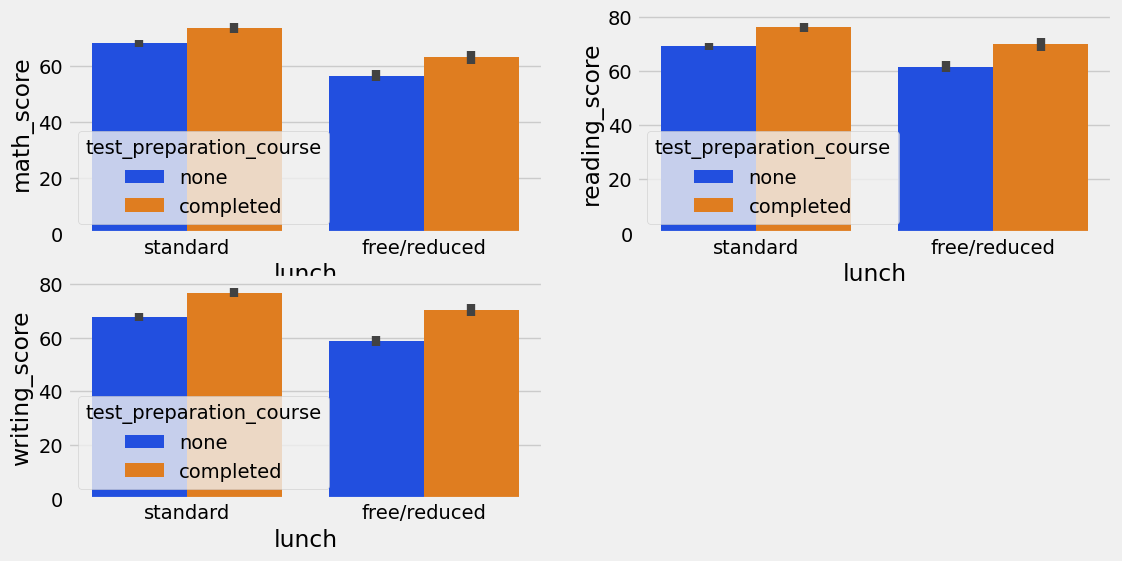

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'],palette='bright')
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'],palette='bright')
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'],palette='bright')

### Insights
- Students who have completed the Test Preparation Course have scores higher in all three categories than those who have not taken the course

### 4.4.6 CHECKING OUTLIERS

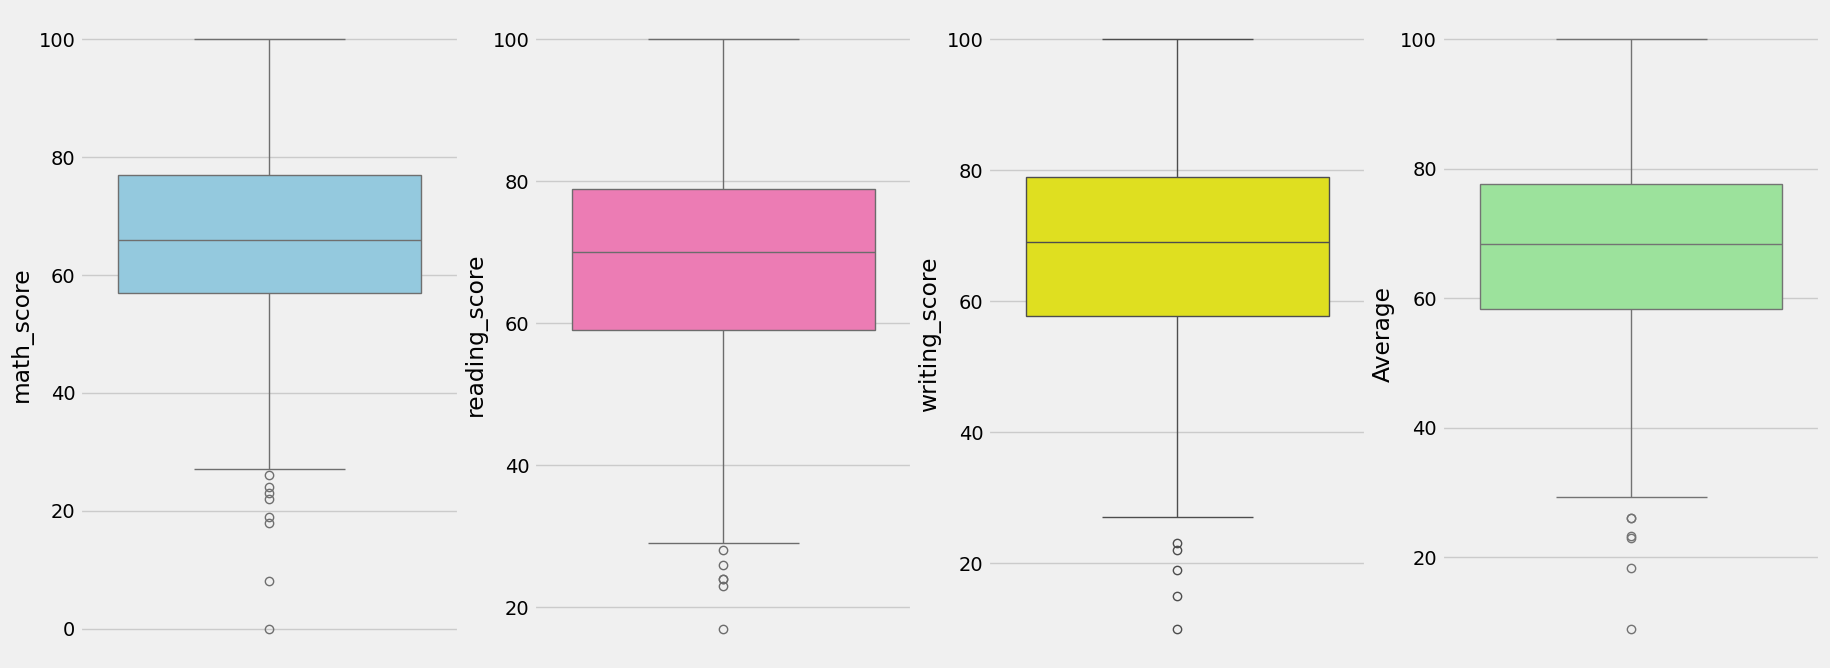

In [34]:
plt.subplots(1,4,figsize=(20,8))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

#### 4>4.7 multivariate Analysis using pairplot

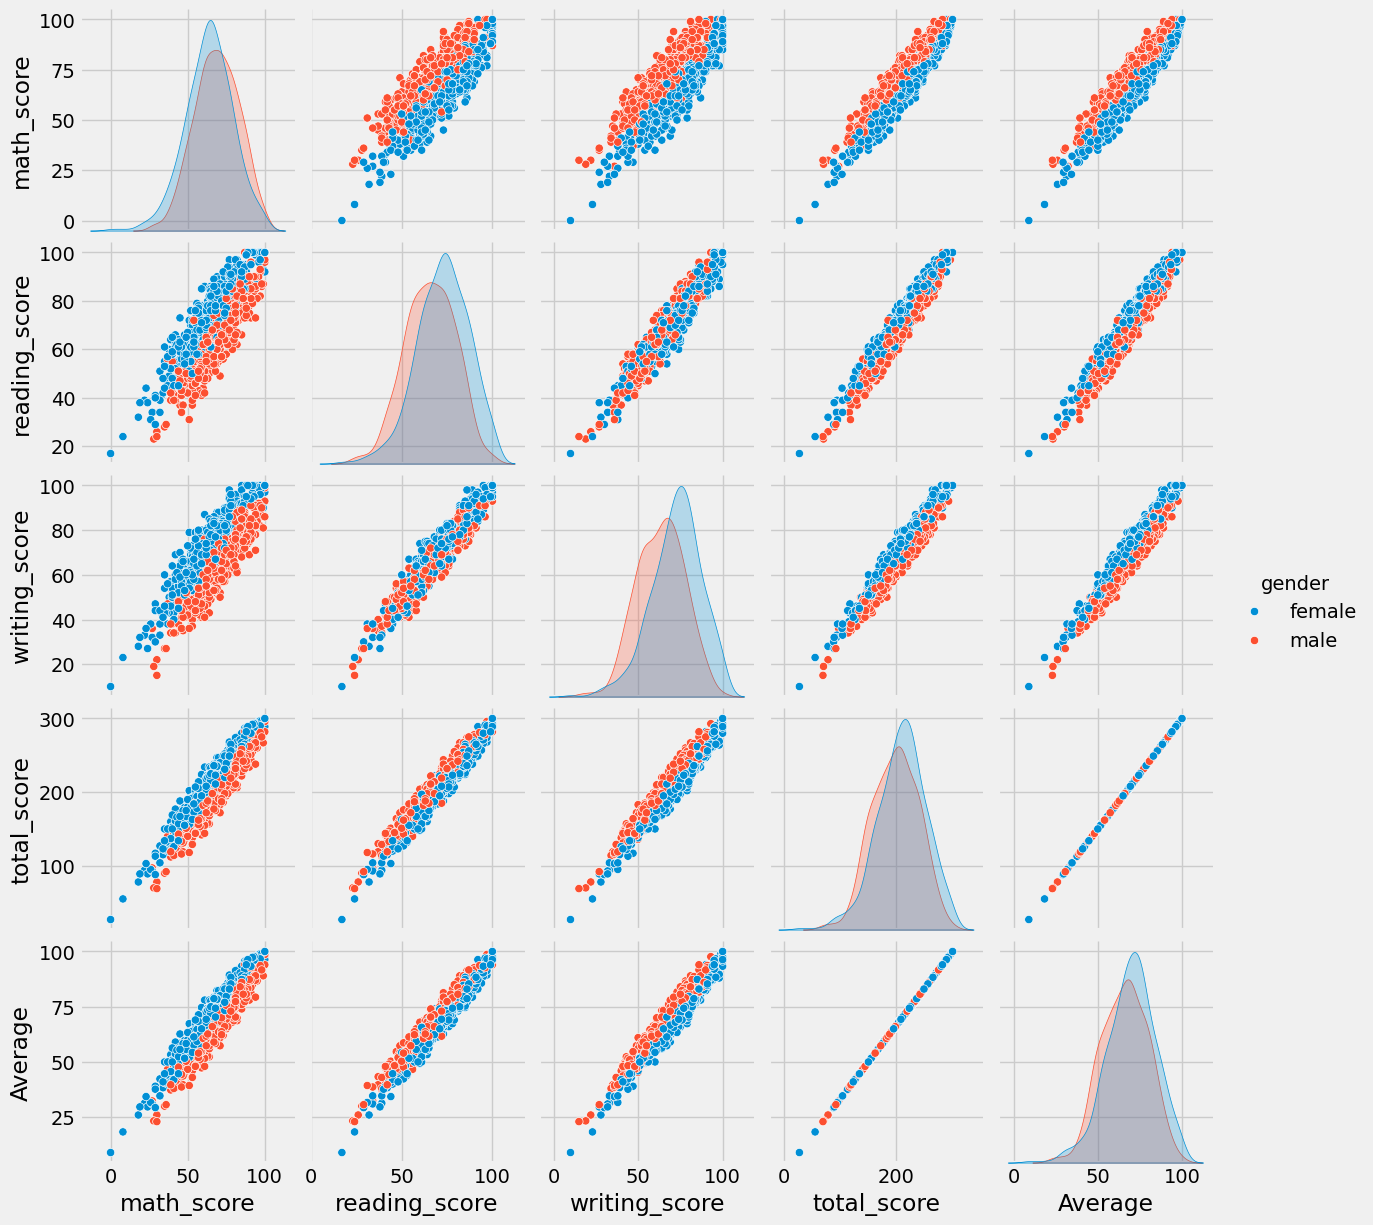

In [35]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other

### 5. Conclusions
- Students performance is realted with lunch,race,parental level education
- Female lead in pass percentage and also are top - scores
- Students Performance is not much related with test preparation course
- finishing preparation course is benefitial